In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [3]:
df=pd.read_csv("SJVN.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1598 non-null   object 
 1   Price     1598 non-null   float64
 2   Open      1598 non-null   float64
 3   High      1598 non-null   float64
 4   Low       1598 non-null   float64
 5   Vol.      1597 non-null   object 
 6   Change %  1598 non-null   object 
dtypes: float64(4), object(3)
memory usage: 87.5+ KB


In [8]:
df=df.iloc[::-1]

In [9]:
df1=df.reset_index()['Price']

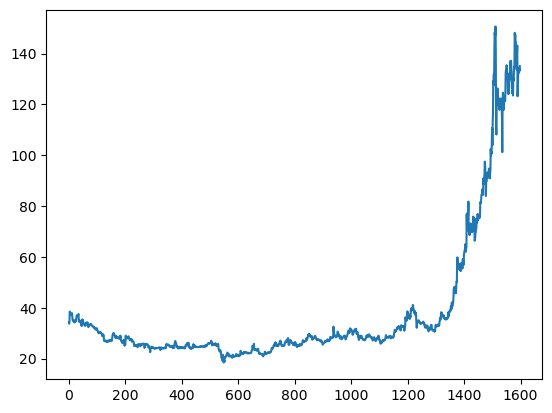

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(1038, 560)

In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(937, 100)
(937,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(459, 100)
(459,)


(None, None)

In [18]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100

15/15 [==============================] - 25s 680ms/step - loss: 7.6671e-04 - val_loss: 0.1162
Epoch 2/100
15/15 [==============================] - 7s 457ms/step - loss: 2.6592e-04 - val_loss: 0.0904
Epoch 3/100
15/15 [==============================] - 6s 392ms/step - loss: 1.6327e-04 - val_loss: 0.0317
Epoch 4/100
15/15 [==============================] - 5s 359ms/step - loss: 7.9344e-05 - val_loss: 0.0097
Epoch 5/100
15/15 [==============================] - 5s 358ms/step - loss: 6.5796e-05 - val_loss: 0.0174
Epoch 6/100
15/15 [==============================] - 7s 444ms/step - loss: 6.2968e-05 - val_loss: 0.0121
Epoch 7/100
15/15 [==============================] - 7s 440ms/step - loss: 6.1522e-05 - val_loss: 0.0115
Epoch 8/100
15/15 [==============================] - 6s 396ms/step - loss: 5.8872e-05 - val_loss: 0.0099
Epoch 9/100
15/15 [==============================] - 7s 442ms/step - loss: 5.5751e-05 - val_loss: 0.0098
Epoch 10/100
15/15 [==============================] -

15/15 [==============================] - 5s 323ms/step - loss: 2.7407e-05 - val_loss: 0.0031
Epoch 77/100
15/15 [==============================] - 6s 375ms/step - loss: 2.7063e-05 - val_loss: 0.0052
Epoch 78/100
15/15 [==============================] - 5s 331ms/step - loss: 2.3441e-05 - val_loss: 0.0060
Epoch 79/100
15/15 [==============================] - 5s 336ms/step - loss: 2.3978e-05 - val_loss: 0.0076
Epoch 80/100
15/15 [==============================] - 5s 341ms/step - loss: 2.3787e-05 - val_loss: 0.0034
Epoch 81/100
15/15 [==============================] - 5s 341ms/step - loss: 2.3091e-05 - val_loss: 0.0056
Epoch 82/100
15/15 [==============================] - 5s 341ms/step - loss: 2.2651e-05 - val_loss: 0.0074
Epoch 83/100
15/15 [==============================] - 5s 356ms/step - loss: 2.4609e-05 - val_loss: 0.0043
Epoch 84/100
15/15 [==============================] - 5s 348ms/step - loss: 2.4161e-05 - val_loss: 0.0048
Epoch 85/100
15/15 [==============================] - 5s 36

In [23]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

15/15 [==============================] - 1s 82ms/step


In [24]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

25.950919399461345

In [ ]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [22]:
len(test_data)

560

In [26]:
x_input=test_data[460:].reshape(1,-1)
x_input.shape

(1, 100)

In [27]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [28]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7466111]
101
1 day input [0.69742814 0.64636914 0.71633888 0.74130106 0.83774584 0.82829047
 0.85741301 0.82526475 0.93645991 0.9822239  0.9720121  0.97163389
 1.         0.92360061 0.71104387 0.6785174  0.77231467 0.80559758
 0.77193646 0.81580938 0.79198185 0.77420575 0.78025719 0.76437216
 0.77080182 0.78555219 0.75189107 0.77685325 0.77723147 0.77534039
 0.78555219 0.77723147 0.76399395 0.78479576 0.76739788 0.71028744
 0.62594554 0.75794251 0.80295008 0.79576399 0.75718608 0.75189107
 0.77344932 0.79009077 0.77874433 0.78933434 0.77874433 0.80900151
 0.86270802 0.86913767 0.85665658 0.88464448 0.88237519 0.84909228
 0.86195159 0.85022693 0.79992436 0.82488654 0.82829047 0.79992436
 0.83358548 0.8392587  0.84152799 0.86611195 0.87859304 0.89750378
 0.87708018 0.897882   0.8827534  0.8623298  0.81807867 0.83245083
 0.80030257 0.80975794 0.79462935 0.84795764 0.83850227 0.85741301
 0.87972769 0.87934947 0.98108926 0.96633888 0.97541604 0.95612708
 0.95347958 0.91187595 0.91717095 

8 day output [[0.48439345]]
9 day input [0.93645991 0.9822239  0.9720121  0.97163389 1.         0.92360061
 0.71104387 0.6785174  0.77231467 0.80559758 0.77193646 0.81580938
 0.79198185 0.77420575 0.78025719 0.76437216 0.77080182 0.78555219
 0.75189107 0.77685325 0.77723147 0.77534039 0.78555219 0.77723147
 0.76399395 0.78479576 0.76739788 0.71028744 0.62594554 0.75794251
 0.80295008 0.79576399 0.75718608 0.75189107 0.77344932 0.79009077
 0.77874433 0.78933434 0.77874433 0.80900151 0.86270802 0.86913767
 0.85665658 0.88464448 0.88237519 0.84909228 0.86195159 0.85022693
 0.79992436 0.82488654 0.82829047 0.79992436 0.83358548 0.8392587
 0.84152799 0.86611195 0.87859304 0.89750378 0.87708018 0.897882
 0.8827534  0.8623298  0.81807867 0.83245083 0.80030257 0.80975794
 0.79462935 0.84795764 0.83850227 0.85741301 0.87972769 0.87934947
 0.98108926 0.96633888 0.97541604 0.95612708 0.95347958 0.91187595
 0.91717095 0.87178517 0.91717095 0.94326778 0.79236006 0.81543116
 0.85287443 0.86913767 0.

16 day output [[0.34638557]]
17 day input [0.77231467 0.80559758 0.77193646 0.81580938 0.79198185 0.77420575
 0.78025719 0.76437216 0.77080182 0.78555219 0.75189107 0.77685325
 0.77723147 0.77534039 0.78555219 0.77723147 0.76399395 0.78479576
 0.76739788 0.71028744 0.62594554 0.75794251 0.80295008 0.79576399
 0.75718608 0.75189107 0.77344932 0.79009077 0.77874433 0.78933434
 0.77874433 0.80900151 0.86270802 0.86913767 0.85665658 0.88464448
 0.88237519 0.84909228 0.86195159 0.85022693 0.79992436 0.82488654
 0.82829047 0.79992436 0.83358548 0.8392587  0.84152799 0.86611195
 0.87859304 0.89750378 0.87708018 0.897882   0.8827534  0.8623298
 0.81807867 0.83245083 0.80030257 0.80975794 0.79462935 0.84795764
 0.83850227 0.85741301 0.87972769 0.87934947 0.98108926 0.96633888
 0.97541604 0.95612708 0.95347958 0.91187595 0.91717095 0.87178517
 0.91717095 0.94326778 0.79236006 0.81543116 0.85287443 0.86913767
 0.86187595 0.87110439 0.87503782 0.86739788 0.88184569 0.74661112
 0.71661848 0.6743613

25 day output [[0.23040845]]
26 day input [0.78555219 0.75189107 0.77685325 0.77723147 0.77534039 0.78555219
 0.77723147 0.76399395 0.78479576 0.76739788 0.71028744 0.62594554
 0.75794251 0.80295008 0.79576399 0.75718608 0.75189107 0.77344932
 0.79009077 0.77874433 0.78933434 0.77874433 0.80900151 0.86270802
 0.86913767 0.85665658 0.88464448 0.88237519 0.84909228 0.86195159
 0.85022693 0.79992436 0.82488654 0.82829047 0.79992436 0.83358548
 0.8392587  0.84152799 0.86611195 0.87859304 0.89750378 0.87708018
 0.897882   0.8827534  0.8623298  0.81807867 0.83245083 0.80030257
 0.80975794 0.79462935 0.84795764 0.83850227 0.85741301 0.87972769
 0.87934947 0.98108926 0.96633888 0.97541604 0.95612708 0.95347958
 0.91187595 0.91717095 0.87178517 0.91717095 0.94326778 0.79236006
 0.81543116 0.85287443 0.86913767 0.86187595 0.87110439 0.87503782
 0.86739788 0.88184569 0.74661112 0.71661848 0.67436135 0.63182956
 0.59335142 0.55983508 0.53099585 0.5061326  0.48439345 0.46491036
 0.44689685 0.429715

In [29]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [30]:
len(df1)

1598

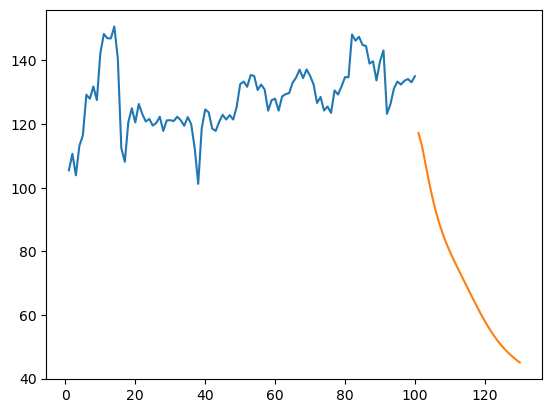

In [31]:
plt.plot(day_new,scaler.inverse_transform(df1[1498:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

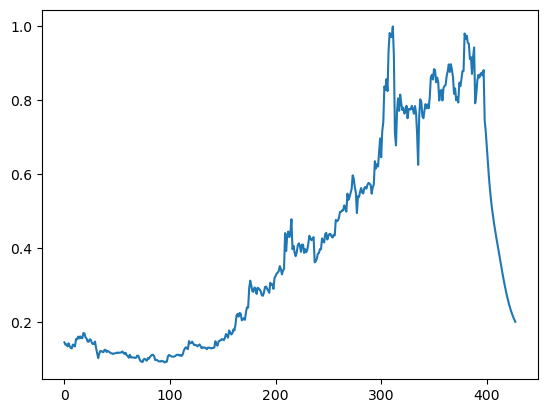

In [32]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])